In [4]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
q = QuantumRegister(5,name='qubit')
c = ClassicalRegister(5,name='bits')
qc = QuantumCircuit(q,c)

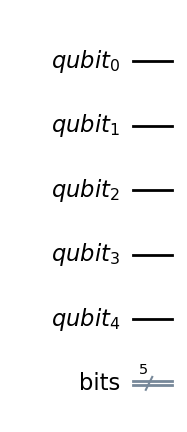

In [5]:
qc.draw('mpl')

In [6]:
for i in range(5):
    qc.x(q[i])
    qc.h(q[i])
qc.barrier()
for i in range(2):
    qc.y(q[i])
qc.barrier()
for i in range(2,5):
    qc.z(q[i])

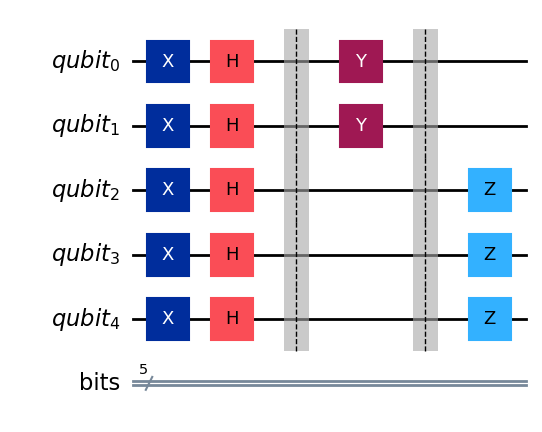

In [7]:
qc.draw('mpl')

In [8]:
print(qc.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{qubit}_{0} :  } & \lstick{{qubit}_{0} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} \barrier[0em]{4} & \qw & \gate{\mathrm{Y}} \barrier[0em]{4} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{1} :  } & \lstick{{qubit}_{1} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \gate{\mathrm{Y}} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{2} :  } & \lstick{{qubit}_{2} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{3} :  } & \lstick{{qubit}_{3} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{4} :  } & \lstick{{qubit}_{4} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{\mathrm{{bits} :  }} & \lstick{\mathrm{{bits} :  }} &

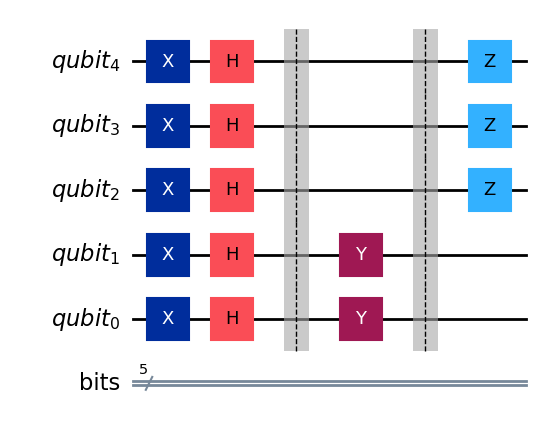

In [9]:
qc.draw('mpl',reverse_bits=True)

C:\Github\Quantum\Quantum_Computing\Basics\basics_env\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: C:\Github\Quantum\Quantum_Computing\Basics\basics_env\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


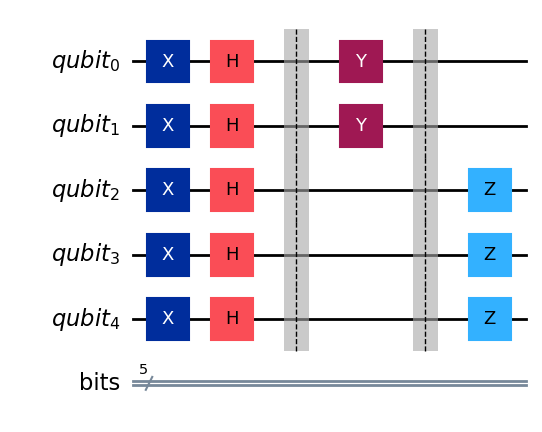

In [10]:
qc.draw('mpl',style='iqx')